In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import squarify

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

C:\Users\plaks\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv(r"H:\New Datasets\Machine Learning Projects\Car Price Prediction.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
print(df.shape)
df.head()

(205, 26)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df.dropna(how = 'any').shape

(205, 26)

In [6]:
df.duplicated().sum()

0

In [7]:
df.drop_duplicates(keep = 'first').shape

(205, 26)

In [8]:
df.drop_duplicates(keep = False).shape

(205, 26)

In [9]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [10]:
df.dropna(subset = ['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'], how = 'any').shape

(205, 26)

In [11]:
df.drop("car_ID", axis = 1, inplace = True)

In [12]:
df.isnull()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
df.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [14]:
df.apply(lambda x: x.dtype)

symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [15]:
total_miss = df.isnull().sum()
perc_miss = total_miss/df.isnull().count()*100

missing_data = pd.DataFrame({'Total missing':total_miss,'% missing':perc_miss})

missing_data.sort_values(by='Total missing',ascending=False).head(3)

,Total missing,% missing
symboling,0,0.0
enginetype,0,0.0
highwaympg,0,0.0


In [16]:
print('Unique Values for Each Feature: \n')
for i in df.columns:
    print(i, ':',df[i].nunique())

Unique Values for Each Feature: 

symboling : 6
CarName : 147
fueltype : 2
aspiration : 2
doornumber : 2
carbody : 5
drivewheel : 3
enginelocation : 2
wheelbase : 53
carlength : 75
carwidth : 44
carheight : 49
curbweight : 171
enginetype : 7
cylindernumber : 7
enginesize : 44
fuelsystem : 8
boreratio : 38
stroke : 37
compressionratio : 32
horsepower : 59
peakrpm : 23
citympg : 29
highwaympg : 30
price : 189


In [17]:
df.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [18]:
numerical_data = df.select_dtypes(include=np.number)
numerical_col = numerical_data.columns 

print("Numeric Features:")
print(numerical_data.head())
print("===="*20)

Numeric Features:
   symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0          3       88.6      168.8      64.1       48.8        2548   
1          3       88.6      168.8      64.1       48.8        2548   
2          1       94.5      171.2      65.5       52.4        2823   
3          2       99.8      176.6      66.2       54.3        2337   
4          2       99.4      176.6      66.4       54.3        2824   

   enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0         130       3.47    2.68               9.0         111     5000   
1         130       3.47    2.68               9.0         111     5000   
2         152       2.68    3.47               9.0         154     5000   
3         109       3.19    3.40              10.0         102     5500   
4         136       3.19    3.40               8.0         115     5500   

   citympg  highwaympg    price  
0       21          27  13495.0  
1       21          27  16500.0  
2 

In [19]:
categorical_data = df.select_dtypes(exclude=np.number) 
categorical_col = categorical_data.columns

print("Categorical Features:")
print(categorical_data.head())
print("===="*20)

Categorical Features:
                    CarName fueltype aspiration doornumber      carbody  \
0        alfa-romero giulia      gas        std        two  convertible   
1       alfa-romero stelvio      gas        std        two  convertible   
2  alfa-romero Quadrifoglio      gas        std        two    hatchback   
3               audi 100 ls      gas        std       four        sedan   
4                audi 100ls      gas        std       four        sedan   

  drivewheel enginelocation enginetype cylindernumber fuelsystem  
0        rwd          front       dohc           four       mpfi  
1        rwd          front       dohc           four       mpfi  
2        rwd          front       ohcv            six       mpfi  
3        fwd          front        ohc           four       mpfi  
4        4wd          front        ohc           five       mpfi  


In [20]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['y']))]
print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  15


In [21]:
#Discrete Numerical Features
discrete_feature = [feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 2


In [22]:
#Continuous Numerical Features
continuous_features = [feature for feature in numerical_features if feature not in discrete_feature+['deposit']]
print("Continuous feature Count: {}".format(len(continuous_features)))

Continuous feature Count: 13


In [23]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [24]:
df.corr()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


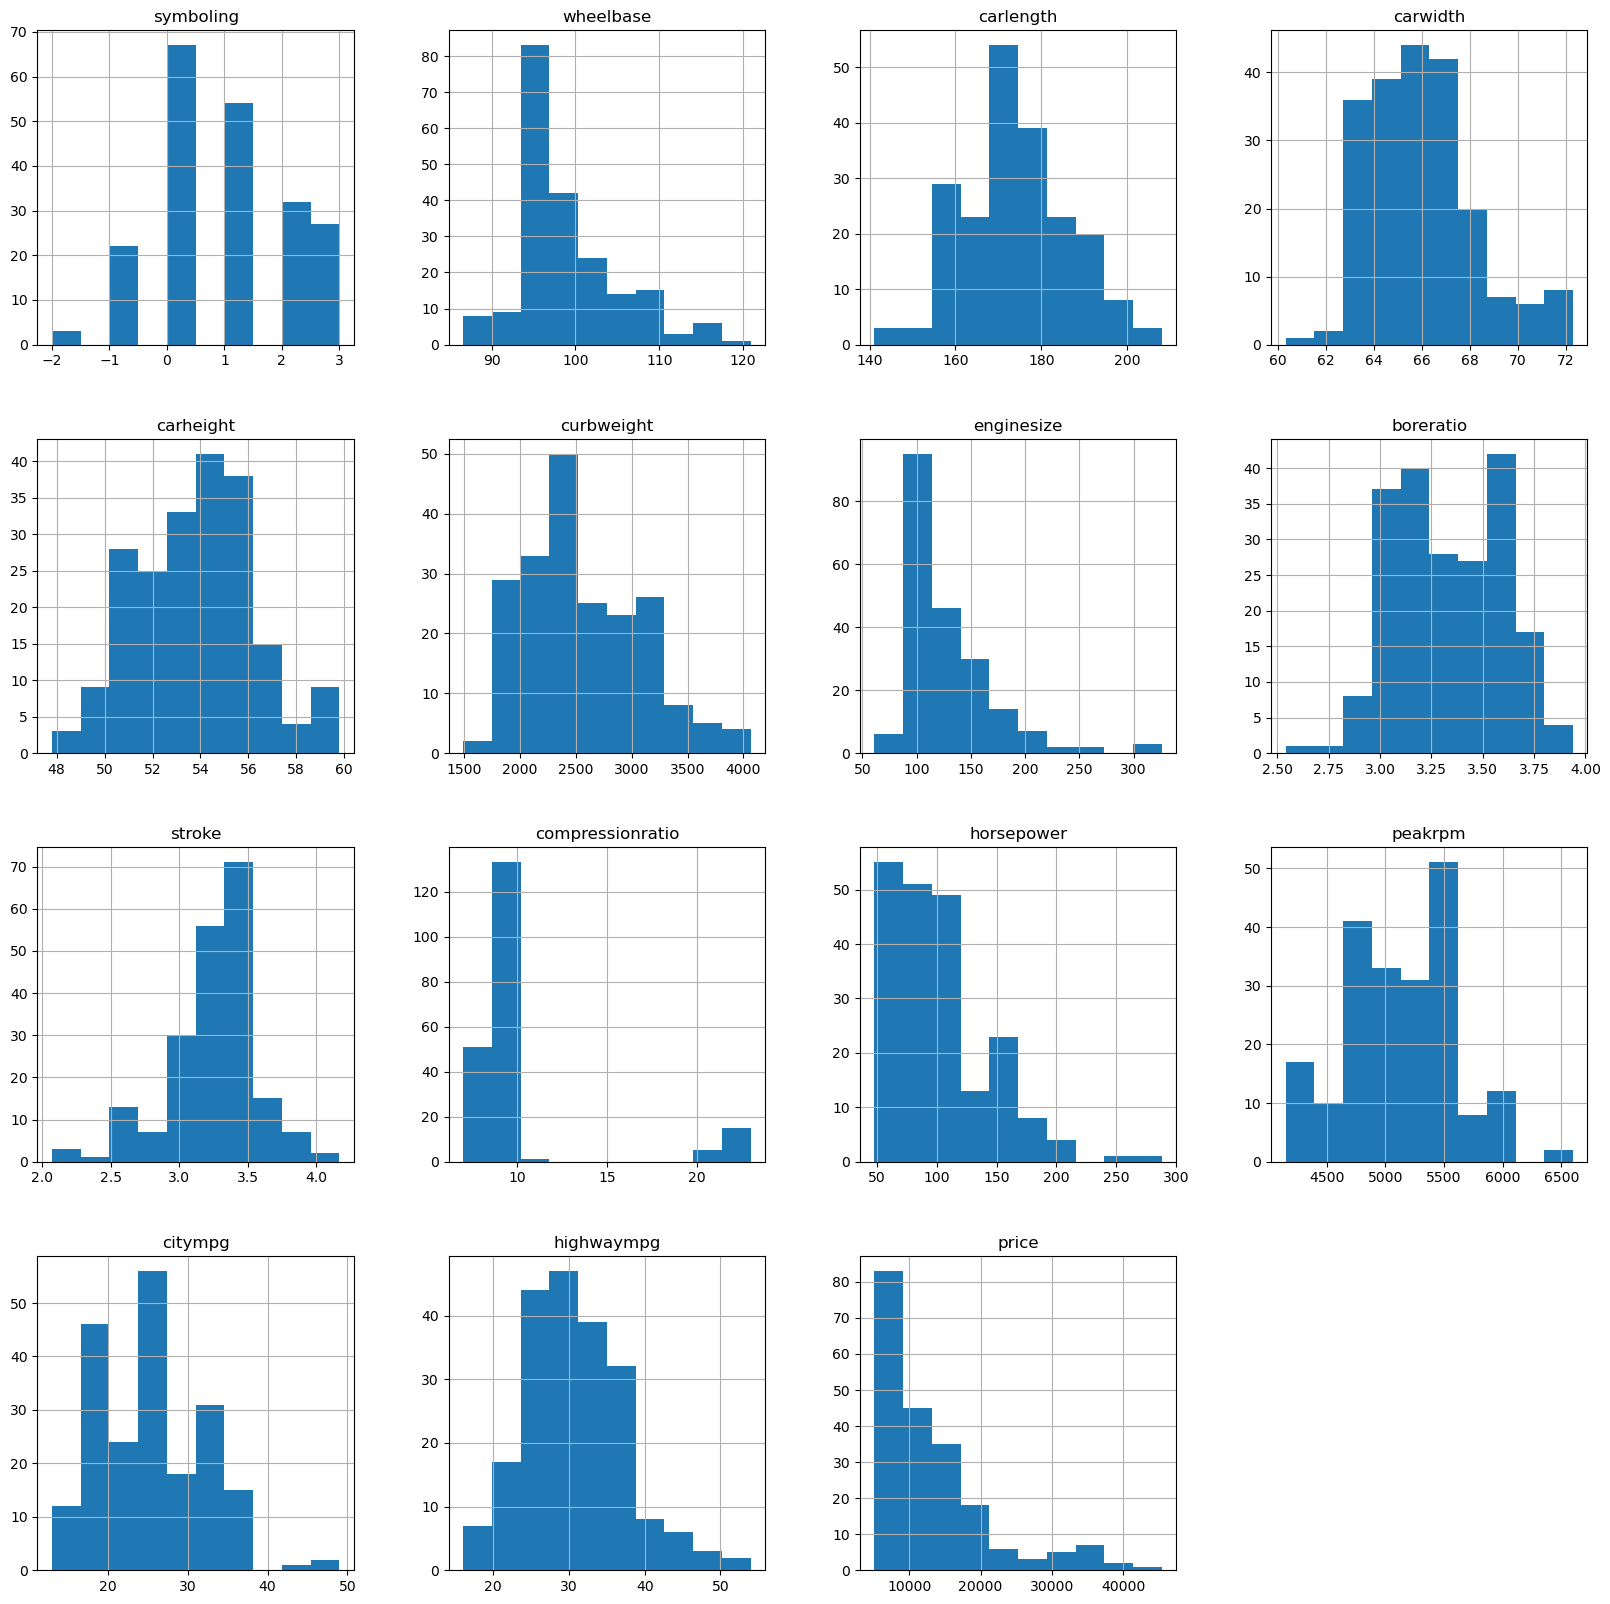

In [25]:
df.hist(figsize=(20,20))
plt.show()

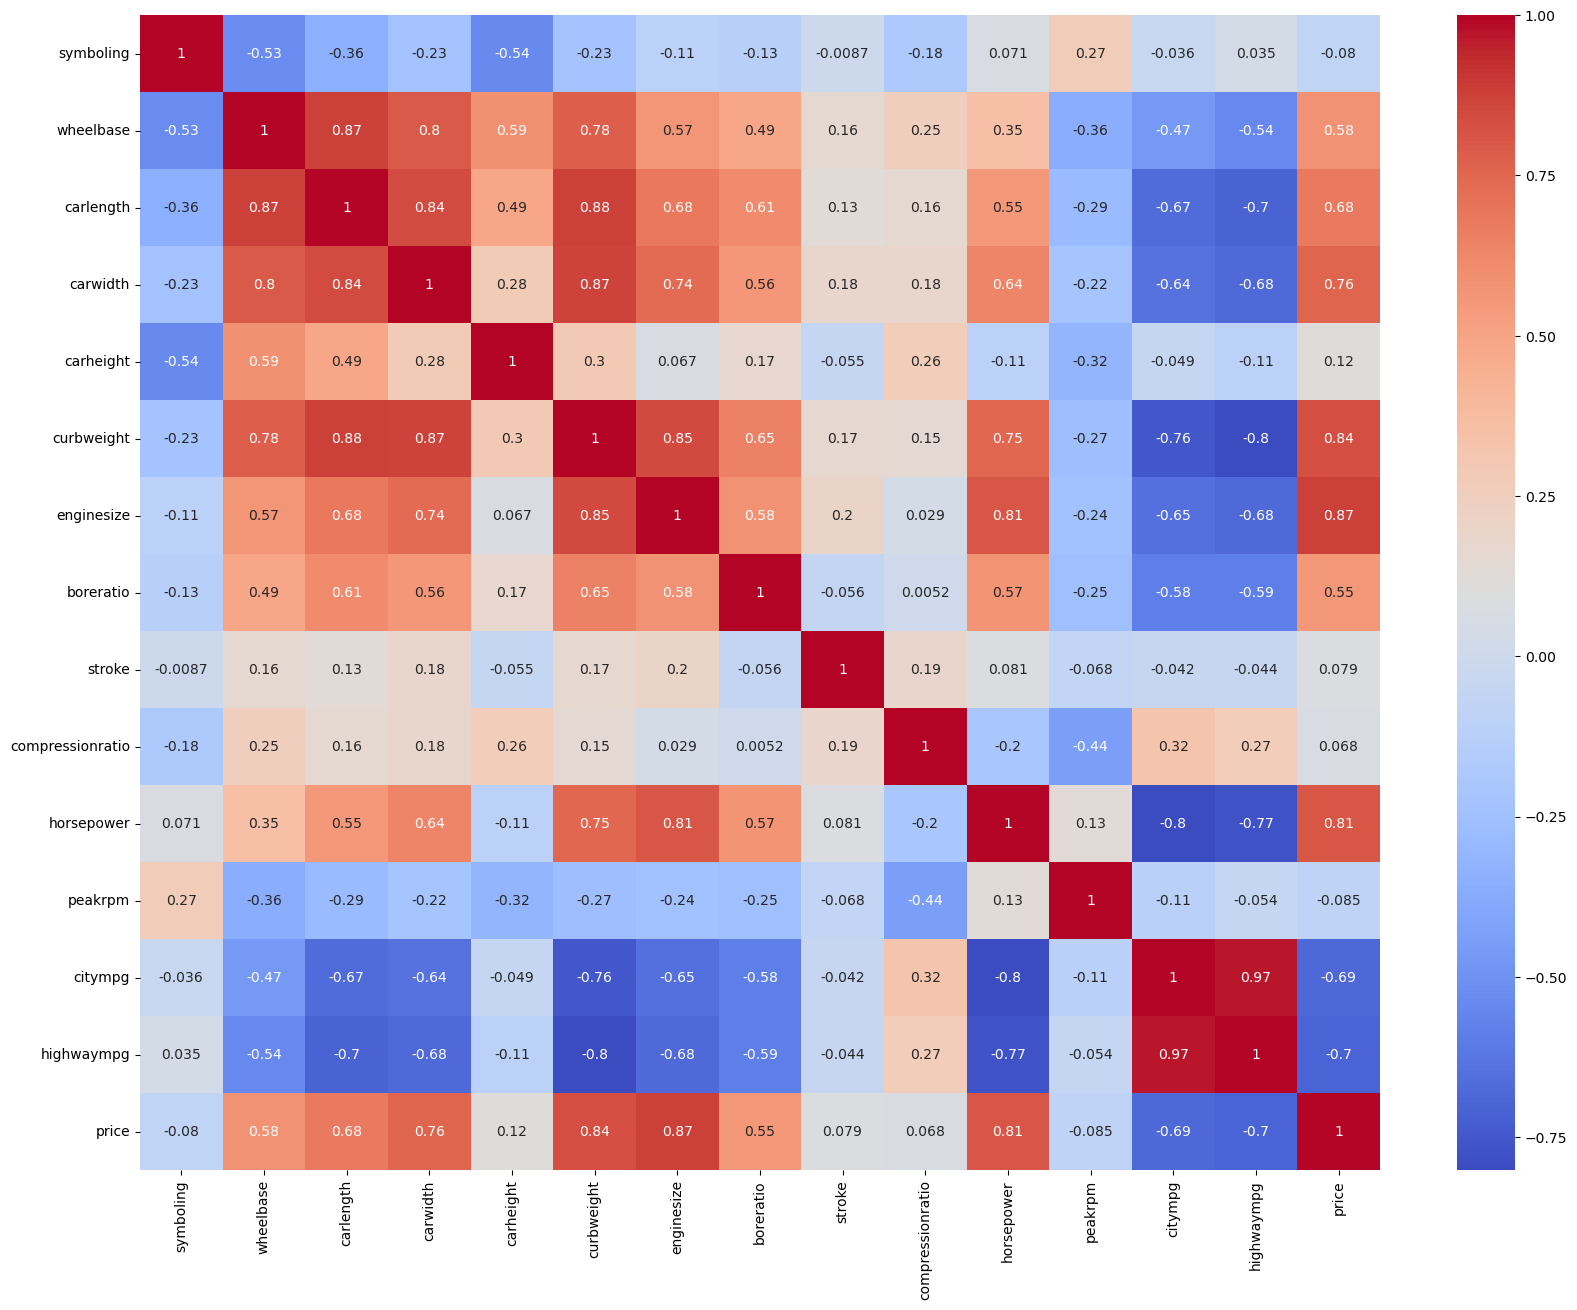

In [26]:
plt.figure(figsize = (20, 15))
correlations = df.corr()
sns.heatmap(correlations, cmap = "coolwarm", annot = True)
plt.show()

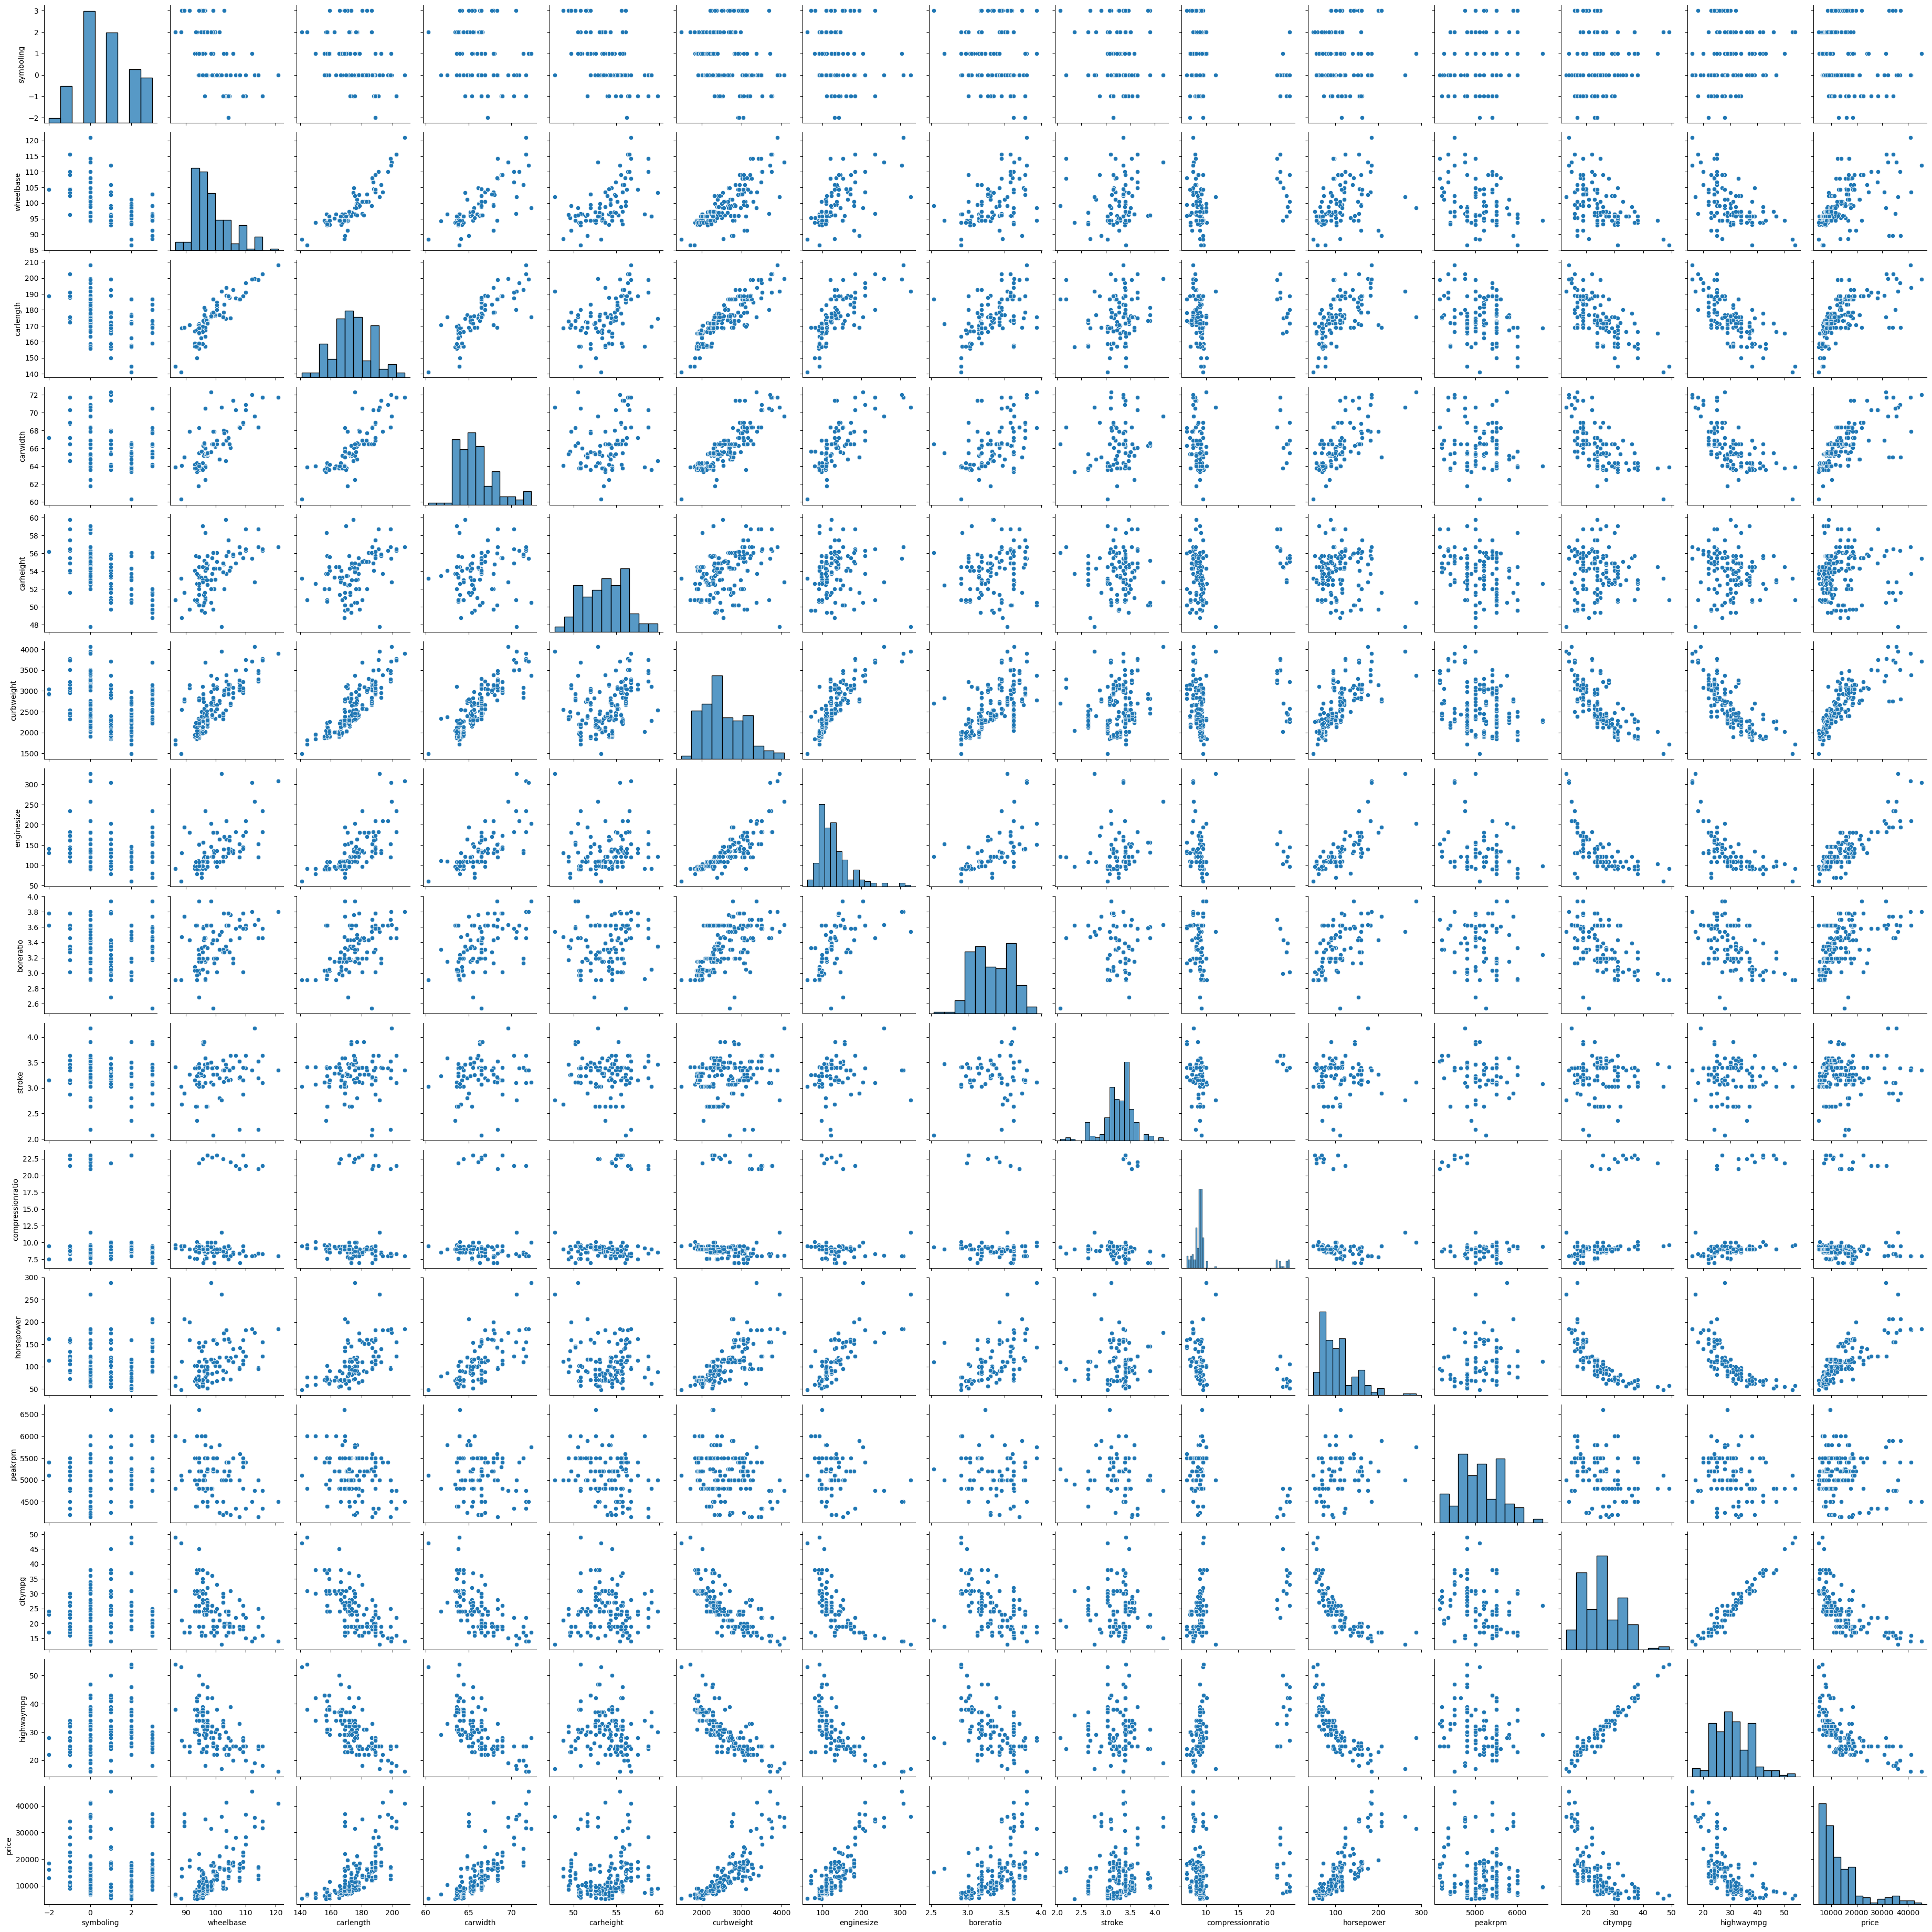

In [27]:
sns.pairplot(df)

In [28]:
def bar_plot(variable):
    var = df[variable]
    varValue = var.value_counts()
    plt.figure(figsize=(15,3))
    plt.bar(varValue.index, varValue,
            color=['#00008b','#00e5ee','#cd1076', '#008080','#cd5555','red','blue'])
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    
    plt.show()
    print("{}: \n {}".format(variable,varValue))

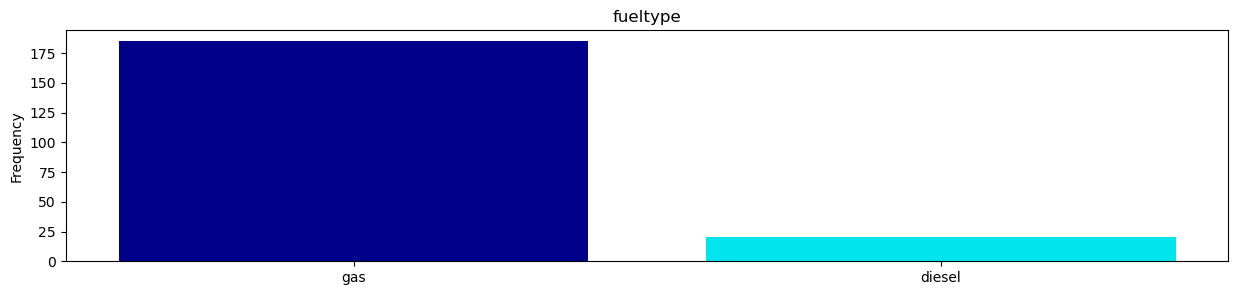

fueltype: 
 gas       185
diesel     20
Name: fueltype, dtype: int64


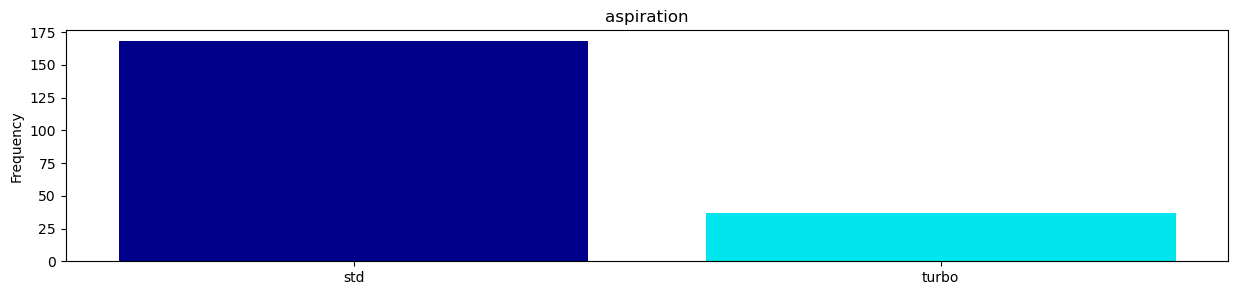

aspiration: 
 std      168
turbo     37
Name: aspiration, dtype: int64


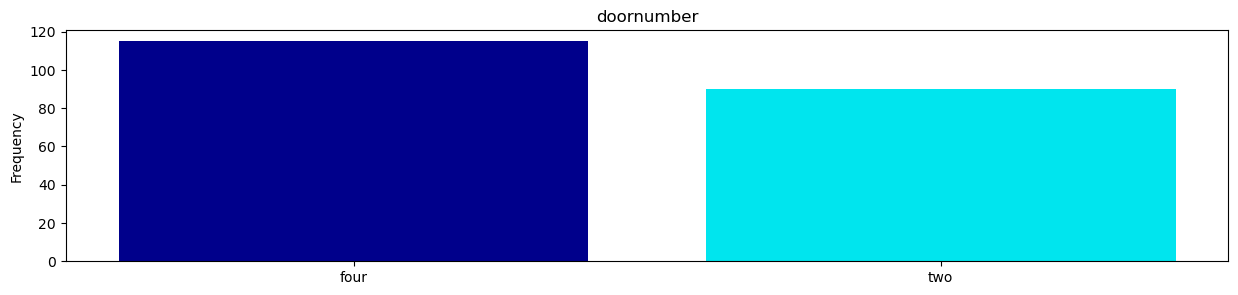

doornumber: 
 four    115
two      90
Name: doornumber, dtype: int64


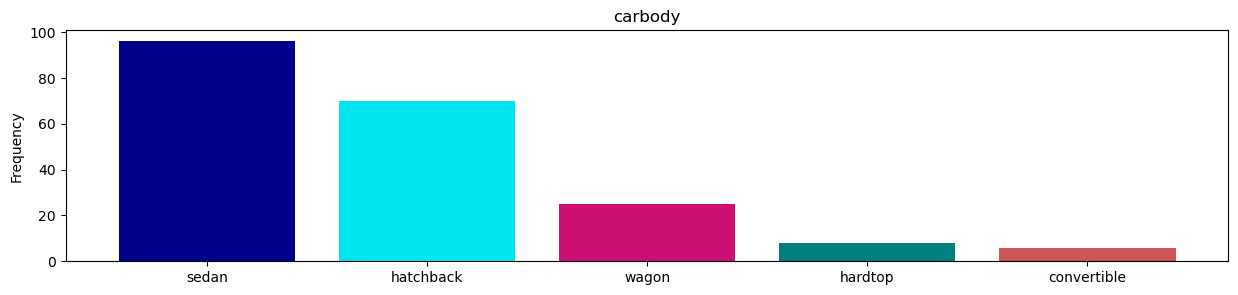

carbody: 
 sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64


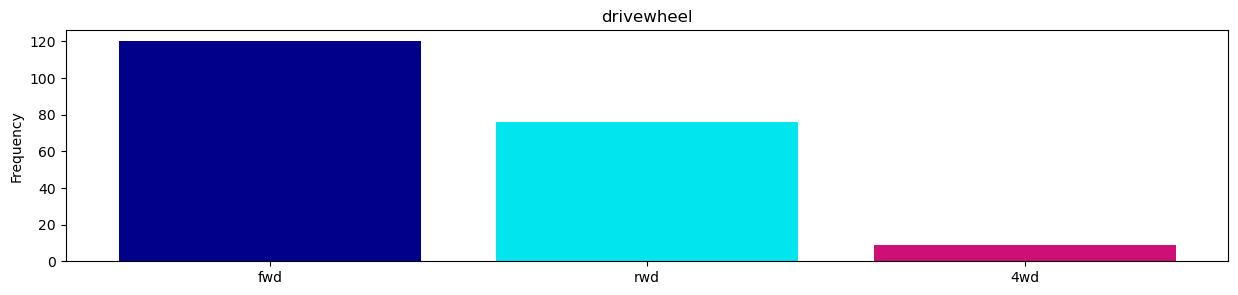

drivewheel: 
 fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64


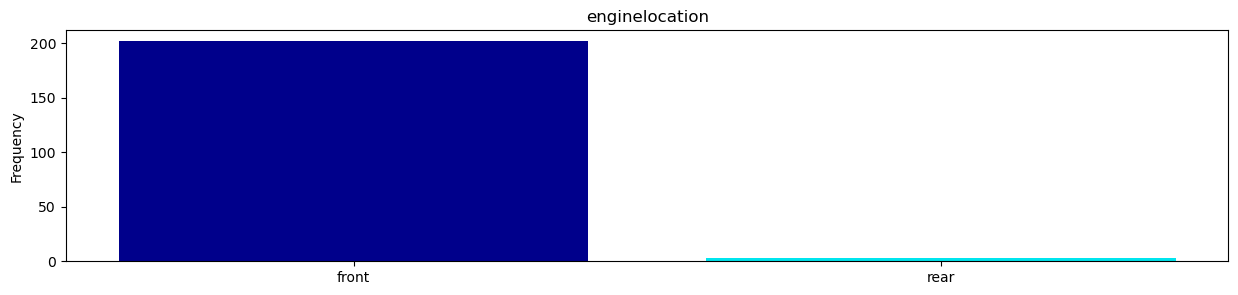

enginelocation: 
 front    202
rear       3
Name: enginelocation, dtype: int64


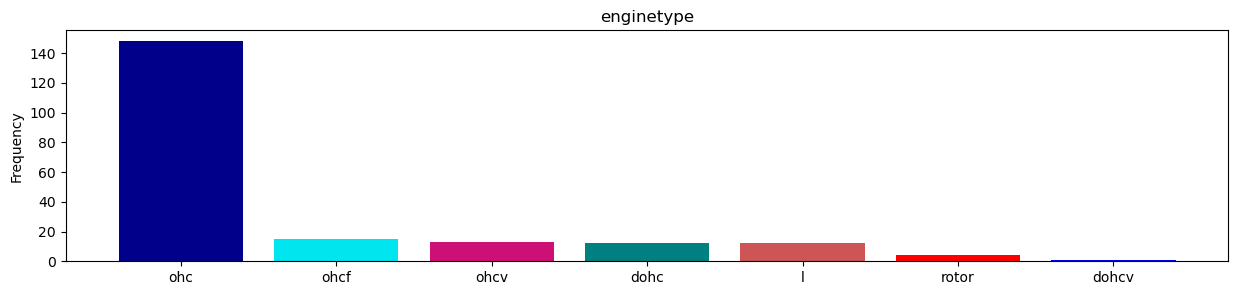

enginetype: 
 ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64


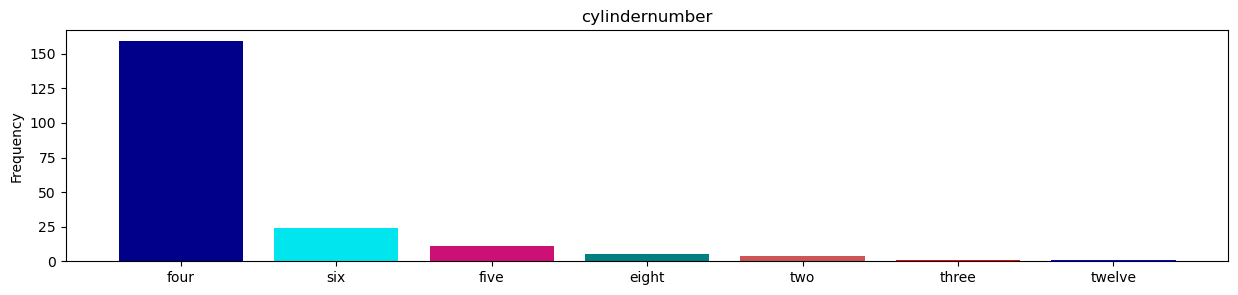

cylindernumber: 
 four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64


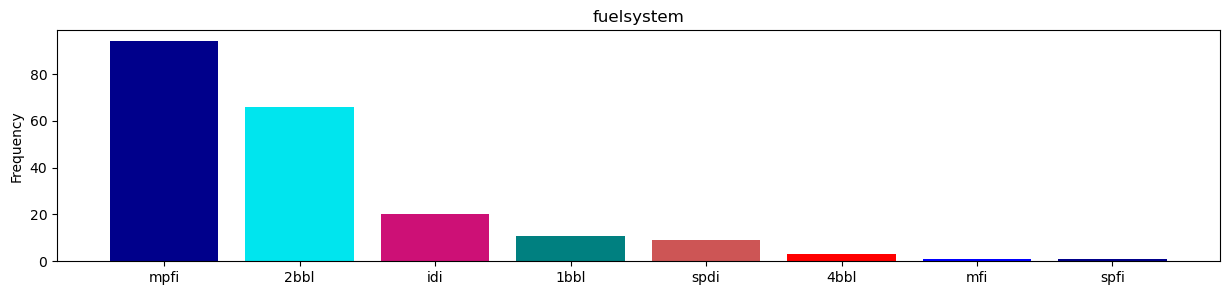

fuelsystem: 
 mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64


In [29]:
categorical_cols = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 
                    'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
for c in categorical_cols:
    bar_plot(c)

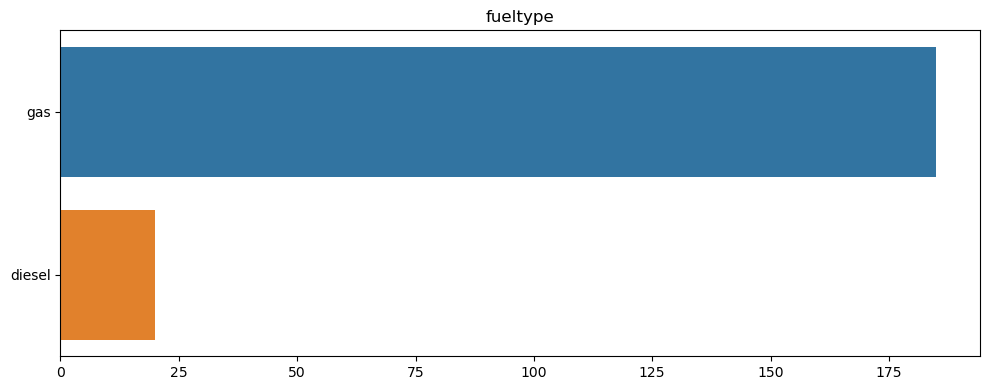

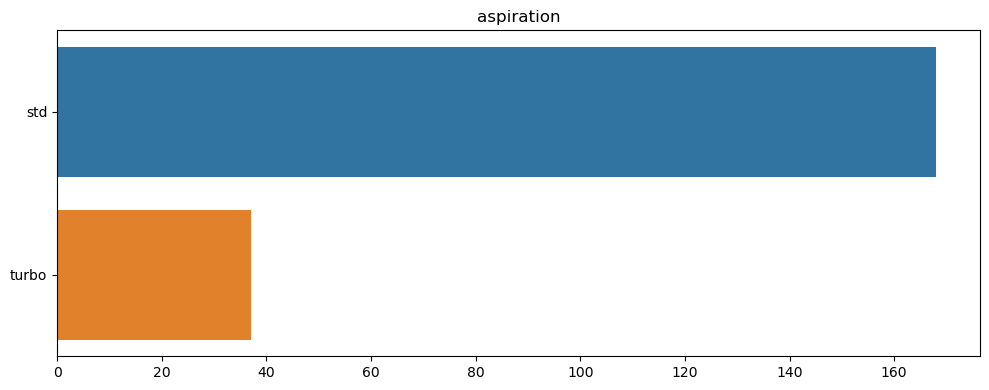

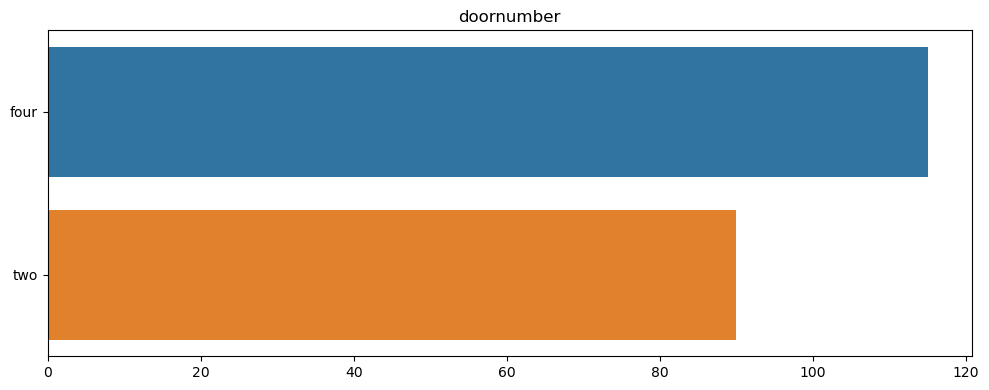

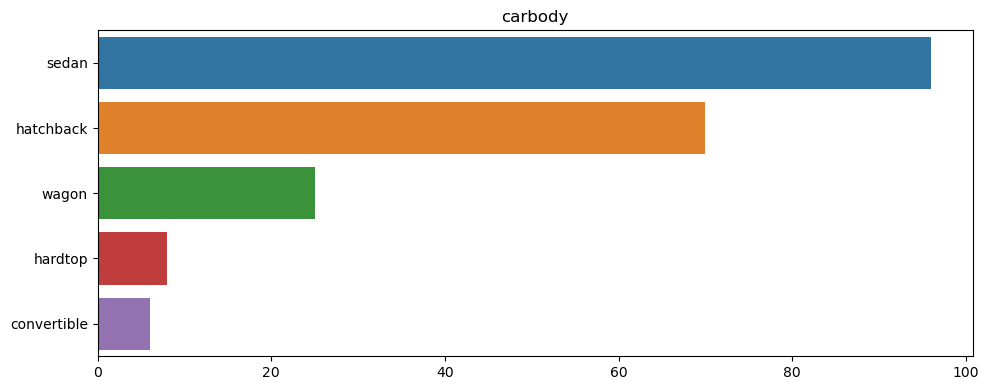

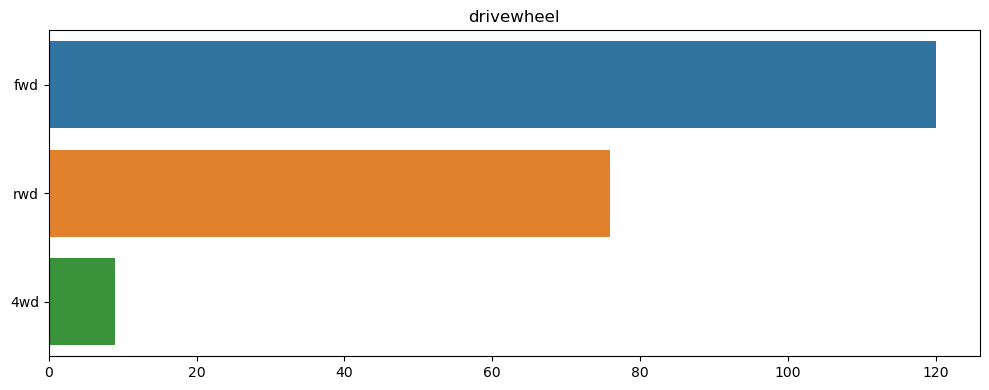

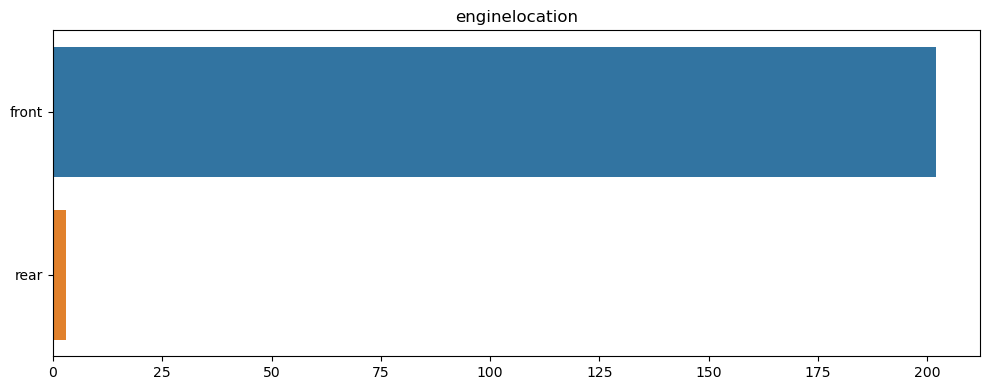

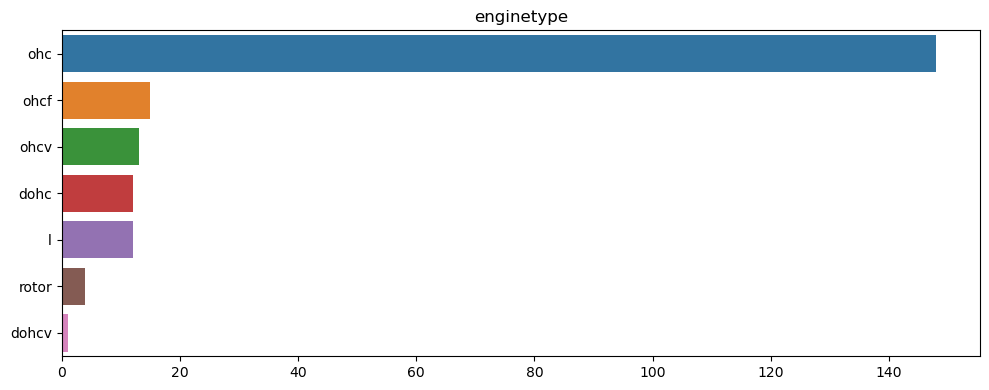

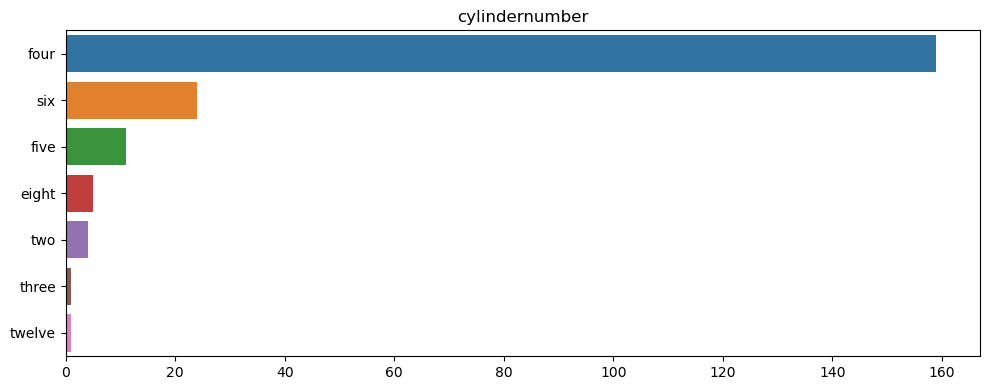

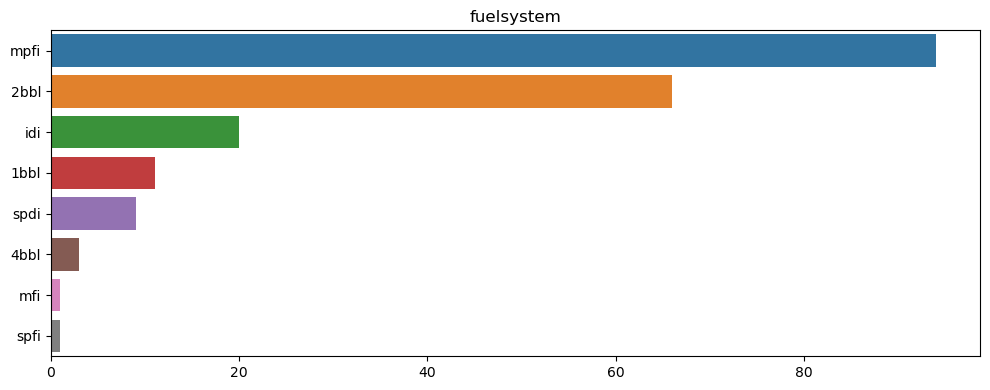

In [30]:
categorcial_variables = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 
                    'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

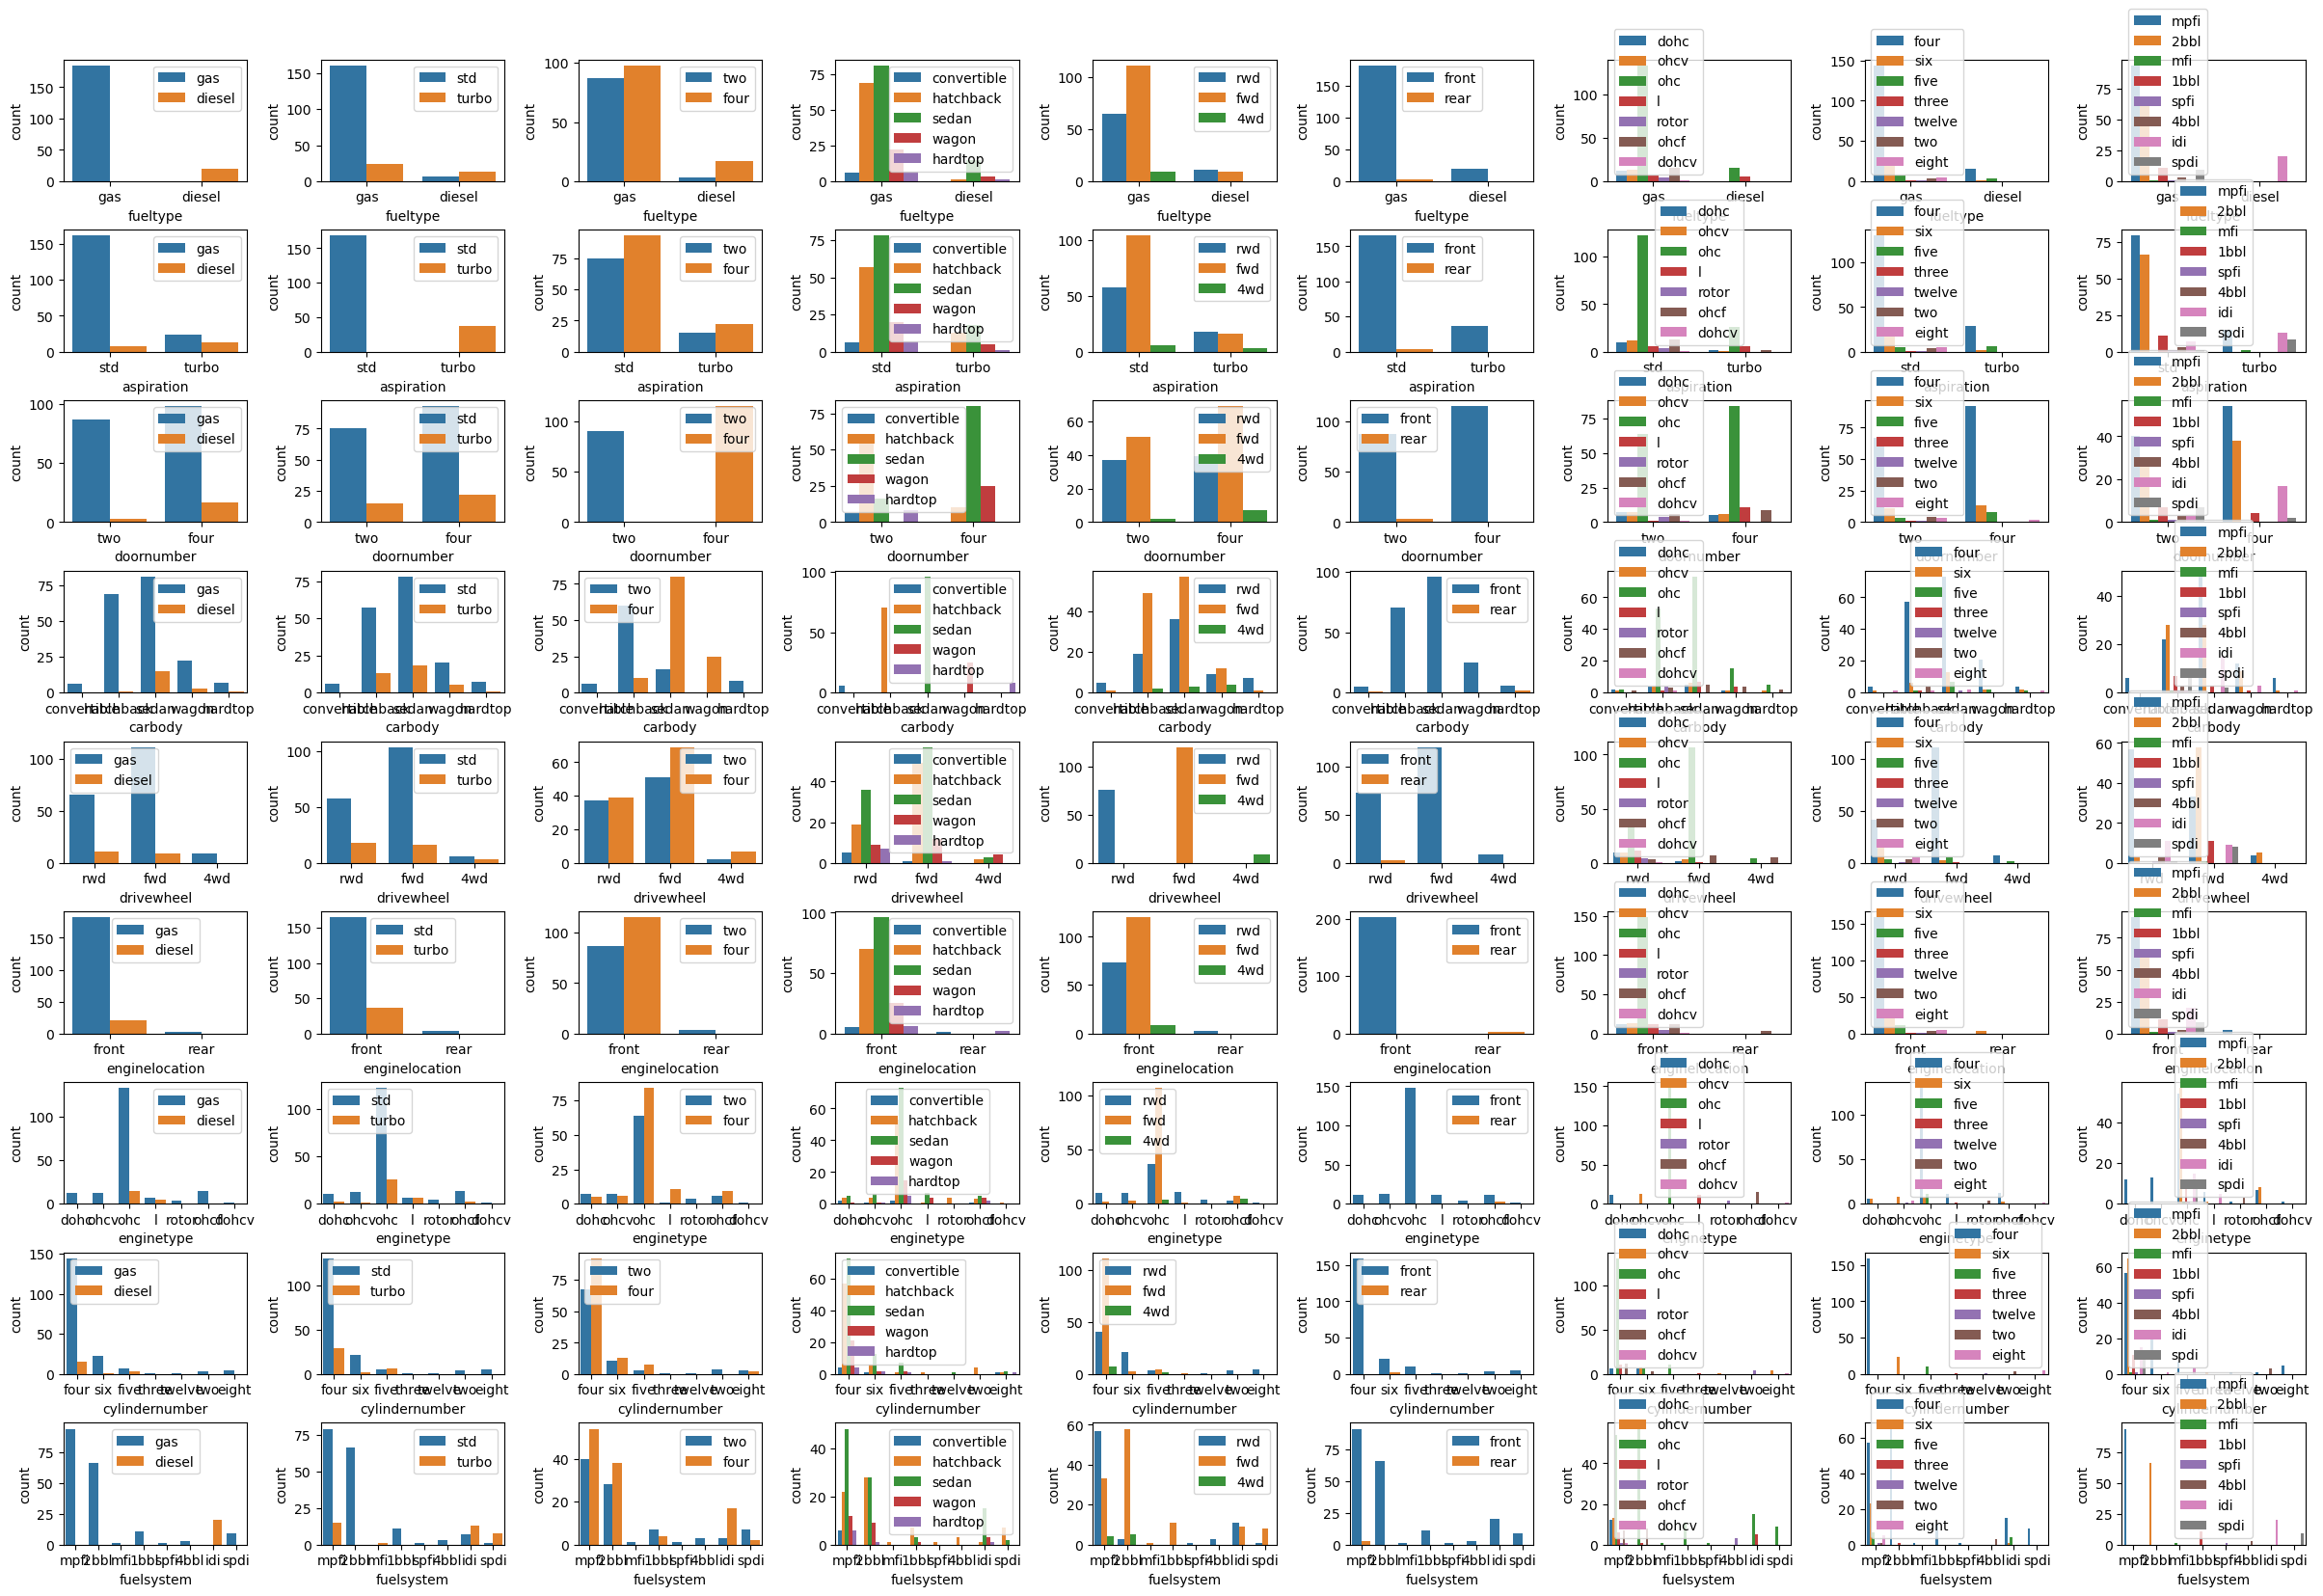

In [31]:
columns = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 
                    'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
fig = plt.figure(figsize = (30, 20))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)
for i in range(1, (len(columns)**2)+1):
    ax = fig.add_subplot(len(columns), len(columns), i)
    ax = sns.countplot(df[columns[int((i-1)/len(columns))]],hue = columns[((i-1)%len(columns))],
                       data = df)
    ax = plt.legend(loc = 'best')

plt.show()

In [32]:
def Count_categorcial_variables(df):
    categorcial_variables = df.select_dtypes(include=['object']).columns.tolist()
    #fig = plt.figure(figsize=(14, 18))

    for index, col in enumerate(categorcial_variables):
        print("------------",col," value counts---------------------")
        print(df[col].value_counts())
        #fig.add_subplot(3, 2, index+1)
        #dataframe[col].value_counts()[:20].plot(kind='bar', title=col, color = "royalblue")
        #plt.tight_layout()
        
    print("\n\n------------Number of categories in each columns---------------------")
    for i in categorcial_variables:
        a = df[i].unique()
        print("There are {} categories in {}".format(len(a),i))
Count_categorcial_variables(df)

------------ CarName  value counts---------------------
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64
------------ fueltype  value counts---------------------
gas       185
diesel     20
Name: fueltype, dtype: int64
------------ aspiration  value counts---------------------
std      168
turbo     37
Name: aspiration, dtype: int64
------------ doornumber  value counts---------------------
four    115
two      90
Name: doornumber, dtype: int64
------------ carbody  value counts---------------------
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
------------ drivewheel  value counts---------------------
fwd    120
rwd     76
4wd      9
Name: d

# Univariate Analysis

In [33]:
df['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

<AxesSubplot:xlabel='count', ylabel='fueltype'>

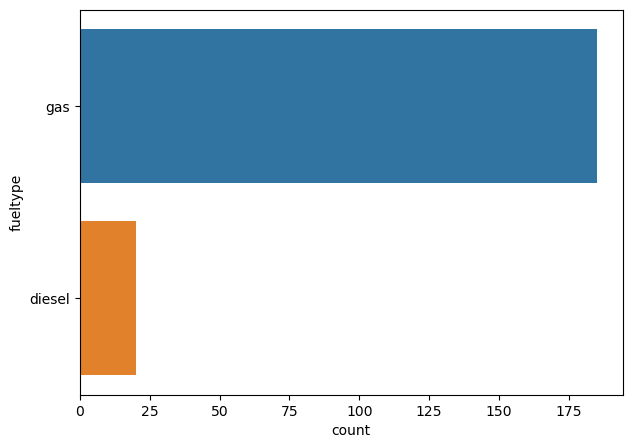

In [34]:
plt.figure(figsize=(7,5))
sns.countplot(y = df['fueltype'])

<AxesSubplot:ylabel='fueltype'>

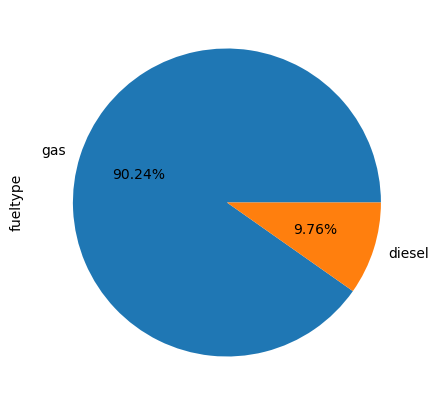

In [35]:
plt.figure(figsize=(7,5))
df['fueltype'].value_counts().plot.pie(autopct="%0.2f%%")

In [36]:
df['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

<AxesSubplot:xlabel='count', ylabel='aspiration'>

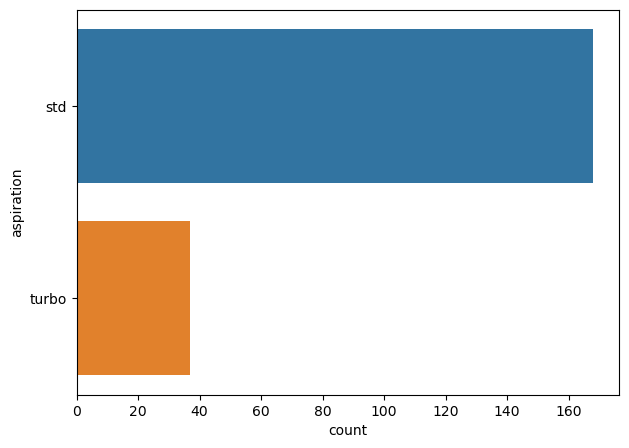

In [37]:
plt.figure(figsize=(7,5))
sns.countplot(y = df['aspiration'])

<AxesSubplot:ylabel='aspiration'>

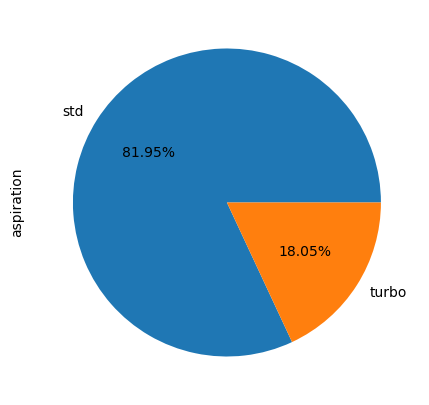

In [38]:
plt.figure(figsize=(7,5))
df['aspiration'].value_counts().plot.pie(autopct="%0.2f%%")

In [39]:
df['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

<AxesSubplot:xlabel='count', ylabel='doornumber'>

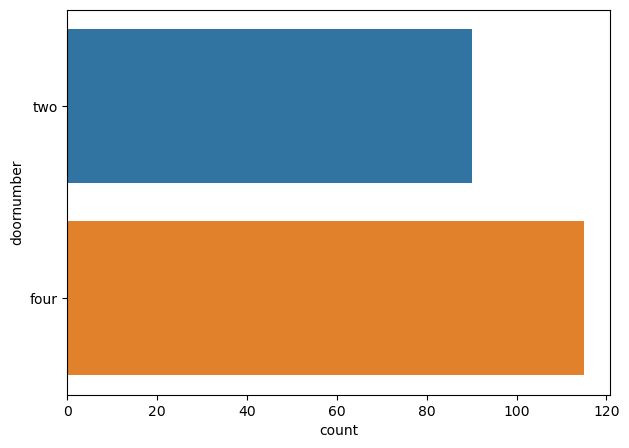

In [40]:
plt.figure(figsize=(7,5))
sns.countplot(y = df['doornumber'])

<AxesSubplot:ylabel='doornumber'>

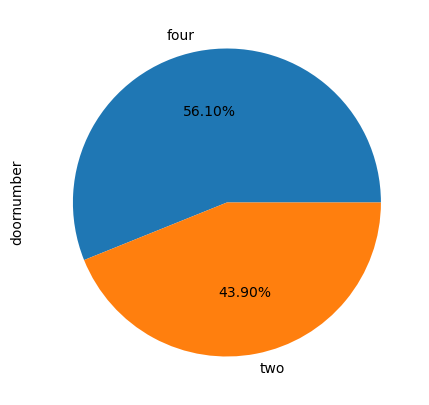

In [41]:
plt.figure(figsize=(7,5))
df['doornumber'].value_counts().plot.pie(autopct="%0.2f%%")

In [42]:
df['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

<AxesSubplot:xlabel='count', ylabel='carbody'>

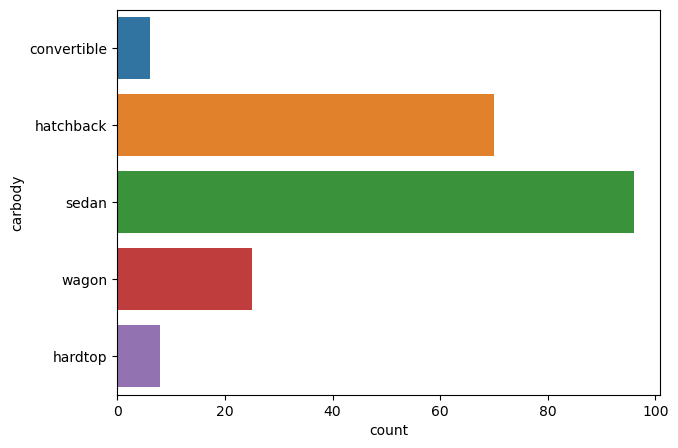

In [43]:
plt.figure(figsize=(7,5))
sns.countplot(y = df['carbody'])

<AxesSubplot:ylabel='carbody'>

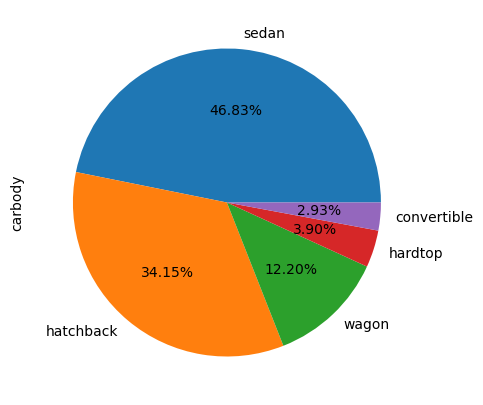

In [44]:
plt.figure(figsize=(7,5))
df['carbody'].value_counts().plot.pie(autopct="%0.2f%%")

In [45]:
df['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

<AxesSubplot:xlabel='count', ylabel='drivewheel'>

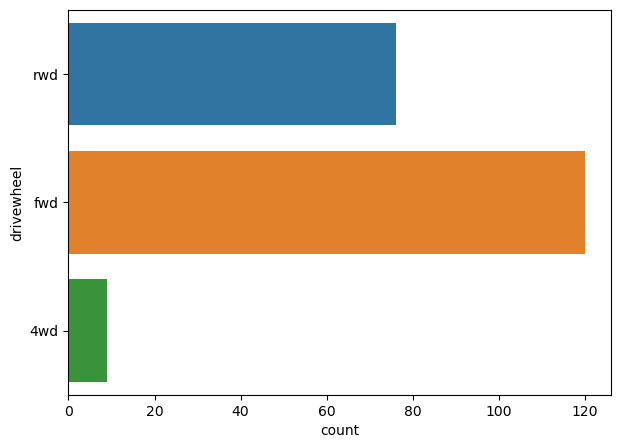

In [46]:
plt.figure(figsize=(7,5))
sns.countplot(y = df['drivewheel'])

<AxesSubplot:ylabel='drivewheel'>

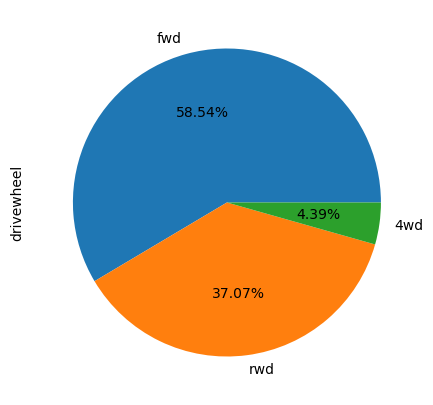

In [47]:
plt.figure(figsize=(7,5))
df['drivewheel'].value_counts().plot.pie(autopct="%0.2f%%")

In [48]:
df['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

<AxesSubplot:xlabel='count', ylabel='enginelocation'>

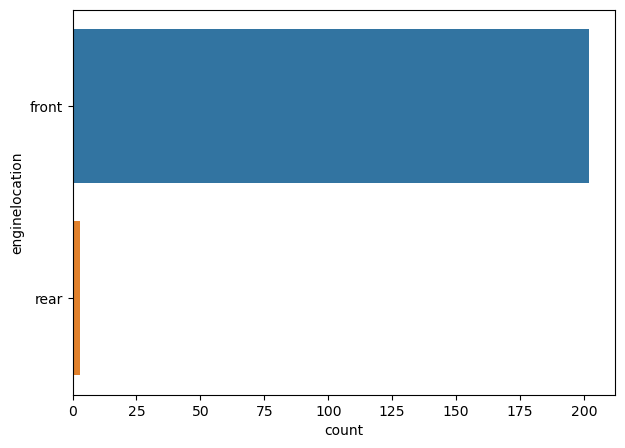

In [49]:
plt.figure(figsize=(7,5))
sns.countplot(y = df['enginelocation'])

<AxesSubplot:ylabel='enginelocation'>

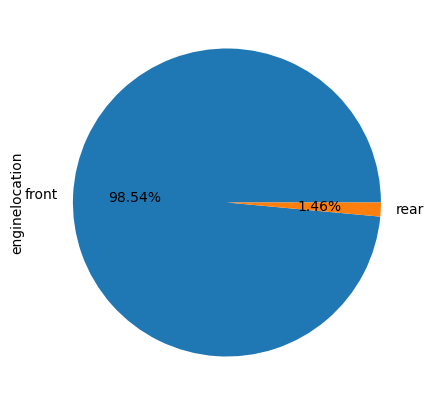

In [50]:
plt.figure(figsize=(7,5))
df['enginelocation'].value_counts().plot.pie(autopct="%0.2f%%")

In [51]:
df['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

<AxesSubplot:xlabel='count', ylabel='enginetype'>

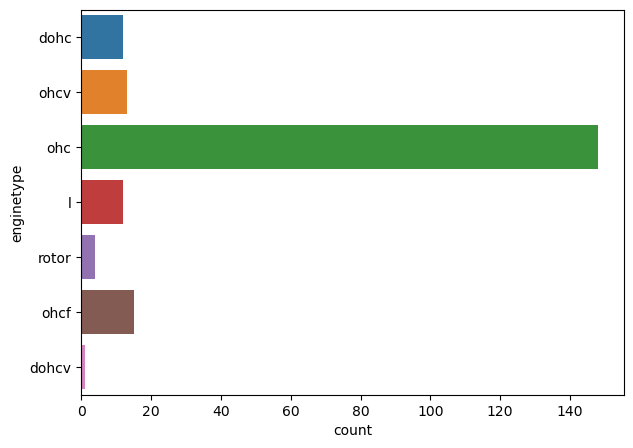

In [52]:
plt.figure(figsize=(7,5))
sns.countplot(y = df['enginetype'])

<AxesSubplot:ylabel='enginetype'>

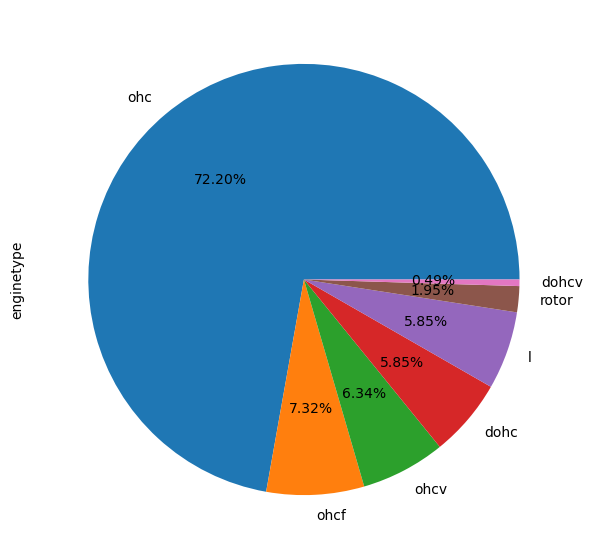

In [53]:
plt.figure(figsize=(10,7))
df['enginetype'].value_counts().plot.pie(autopct="%0.2f%%")

In [54]:
df['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

<AxesSubplot:xlabel='count', ylabel='cylindernumber'>

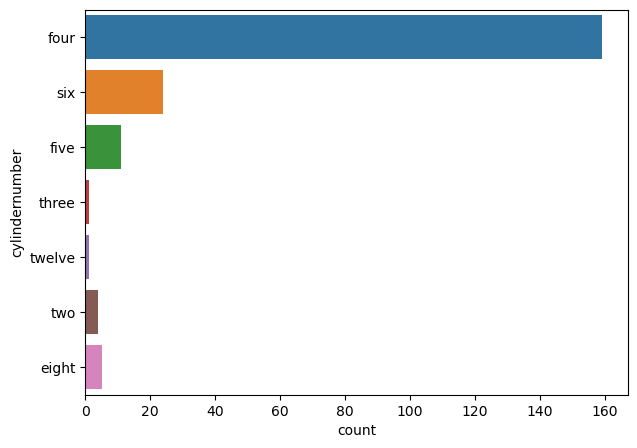

In [55]:
plt.figure(figsize=(7,5))
sns.countplot(y = df['cylindernumber'])

<AxesSubplot:ylabel='cylindernumber'>

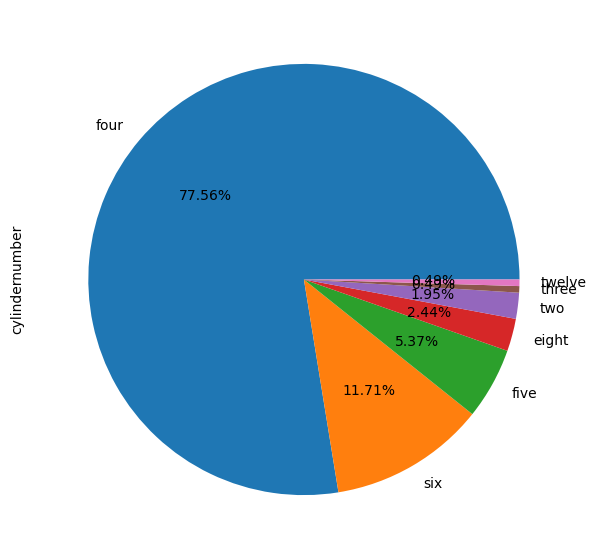

In [56]:
plt.figure(figsize=(10,7))
df['cylindernumber'].value_counts().plot.pie(autopct="%0.2f%%")

In [57]:
df['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

<AxesSubplot:xlabel='count', ylabel='fuelsystem'>

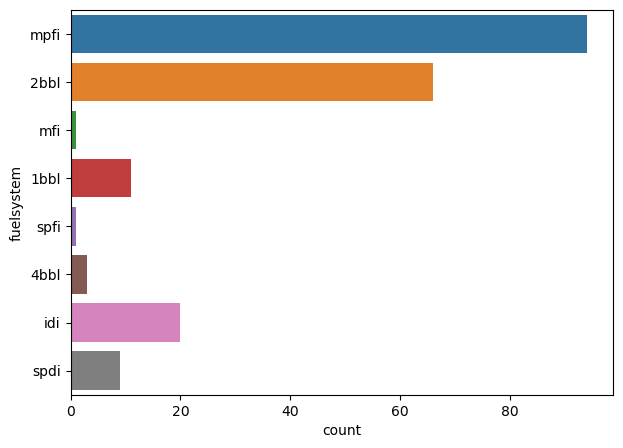

In [58]:
plt.figure(figsize=(7,5))
sns.countplot(y = df['fuelsystem'])

<AxesSubplot:ylabel='fuelsystem'>

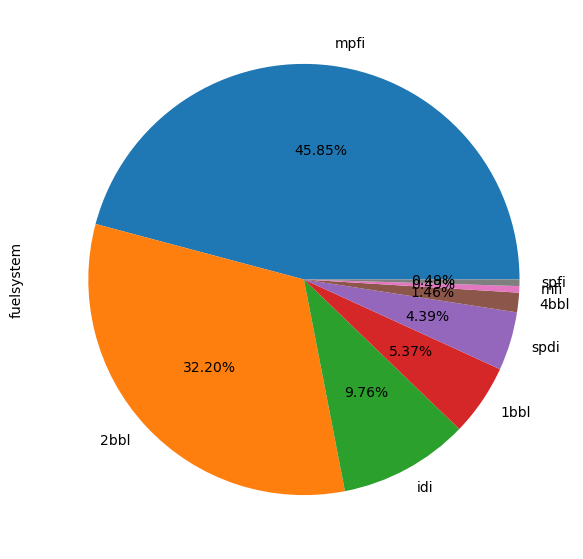

In [59]:
plt.figure(figsize=(10,7))
df['fuelsystem'].value_counts().plot.pie(autopct="%0.2f%%")

# TreeMap

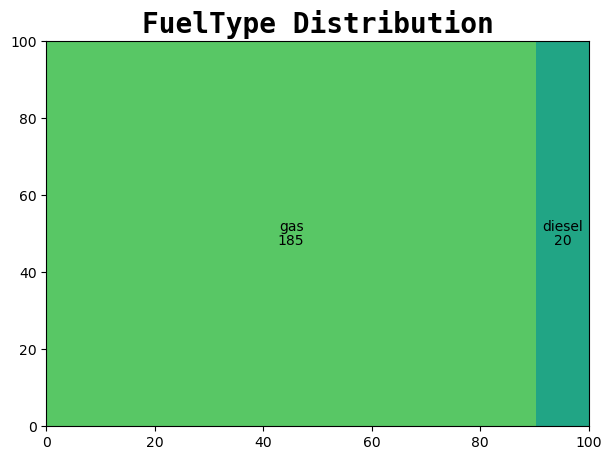

In [60]:
fueltype = df['fueltype'].value_counts()

plt.style.use('default')
plt.figure(figsize = (7, 5))
squarify.plot(sizes = fueltype.values, label = fueltype.index, value = fueltype.values)
plt.title('FuelType Distribution', 
          fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.show()

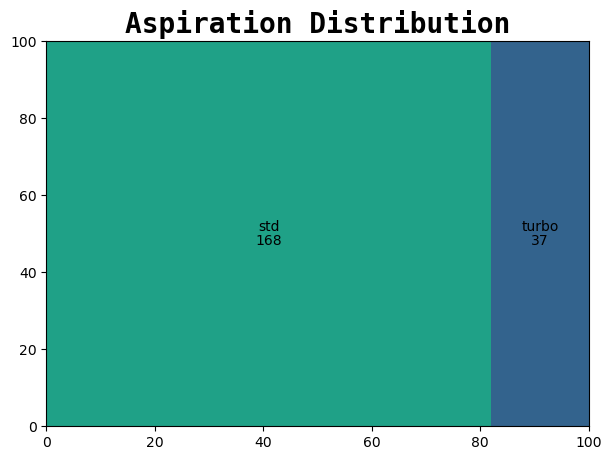

In [61]:
aspiration = df['aspiration'].value_counts()

plt.style.use('default')
plt.figure(figsize = (7, 5))
squarify.plot(sizes = aspiration.values, label = aspiration.index, value = aspiration.values)
plt.title('Aspiration Distribution', 
          fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.show()

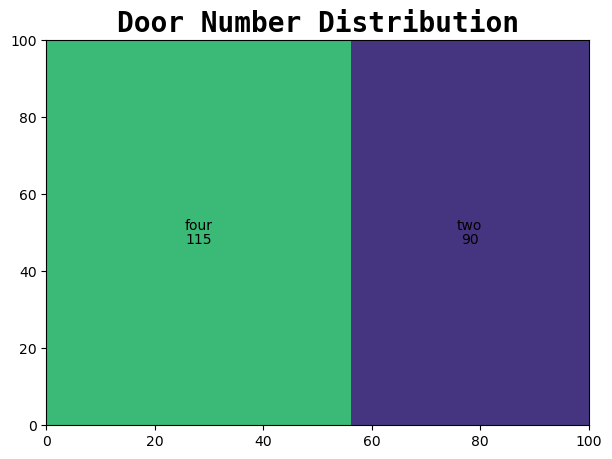

In [62]:
doornumber = df['doornumber'].value_counts()

plt.style.use('default')
plt.figure(figsize = (7, 5))
squarify.plot(sizes = doornumber.values, label = doornumber.index, value = doornumber.values)
plt.title('Door Number Distribution', 
          fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.show()

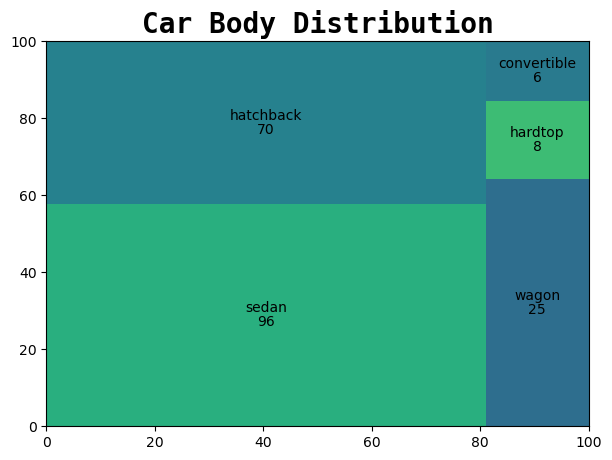

In [63]:
carbody = df['carbody'].value_counts()

plt.style.use('default')
plt.figure(figsize = (7, 5))
squarify.plot(sizes = carbody.values, label = carbody.index, value = carbody.values)
plt.title('Car Body Distribution', 
          fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.show()

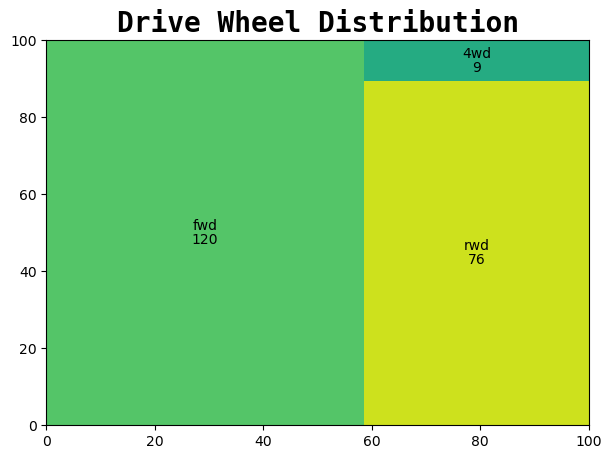

In [64]:
drivewheel = df['drivewheel'].value_counts()

plt.style.use('default')
plt.figure(figsize = (7, 5))
squarify.plot(sizes = drivewheel.values, label = drivewheel.index, value = drivewheel.values)
plt.title('Drive Wheel Distribution', 
          fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.show()

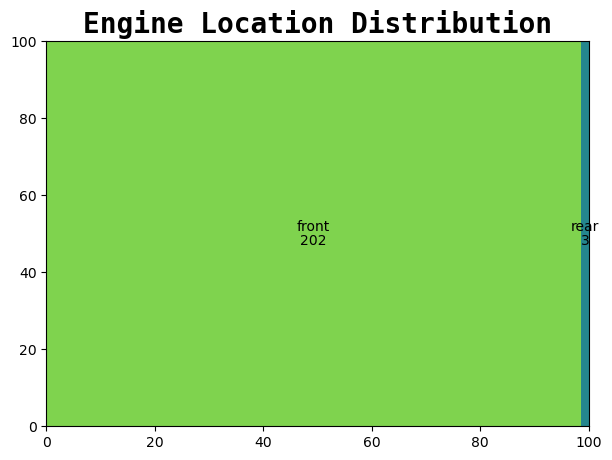

In [65]:
enginelocation = df['enginelocation'].value_counts()

plt.style.use('default')
plt.figure(figsize = (7, 5))
squarify.plot(sizes = enginelocation.values, label = enginelocation.index, 
              value = enginelocation.values)
plt.title('Engine Location Distribution', 
          fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.show()

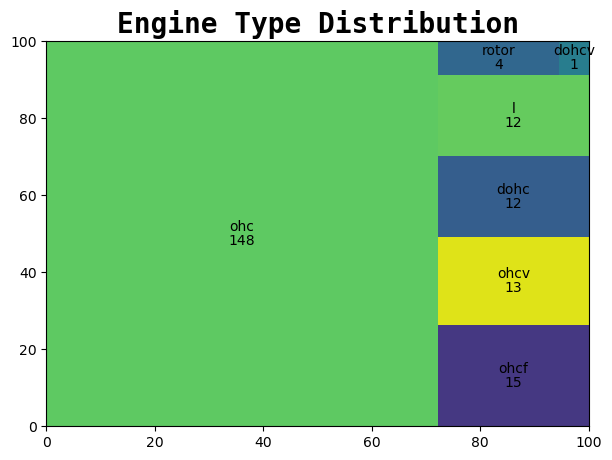

In [66]:
enginetype = df['enginetype'].value_counts()

plt.style.use('default')
plt.figure(figsize = (7, 5))
squarify.plot(sizes = enginetype.values, label = enginetype.index, value = enginetype.values)
plt.title('Engine Type Distribution', 
          fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.show()

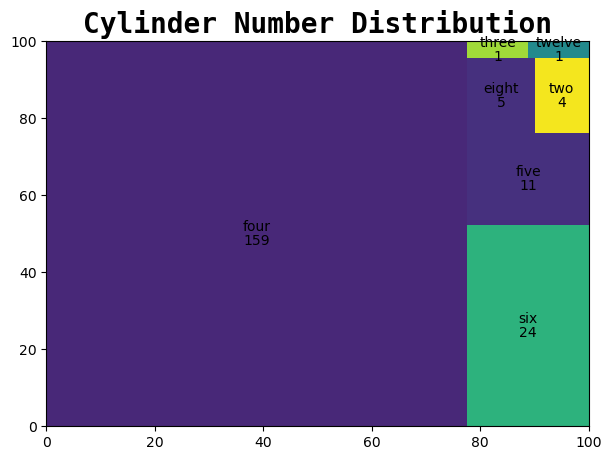

In [67]:
cylindernumber = df['cylindernumber'].value_counts()

plt.style.use('default')
plt.figure(figsize = (7, 5))
squarify.plot(sizes = cylindernumber.values, label = cylindernumber.index, 
              value = cylindernumber.values)
plt.title('Cylinder Number Distribution', 
          fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.show()

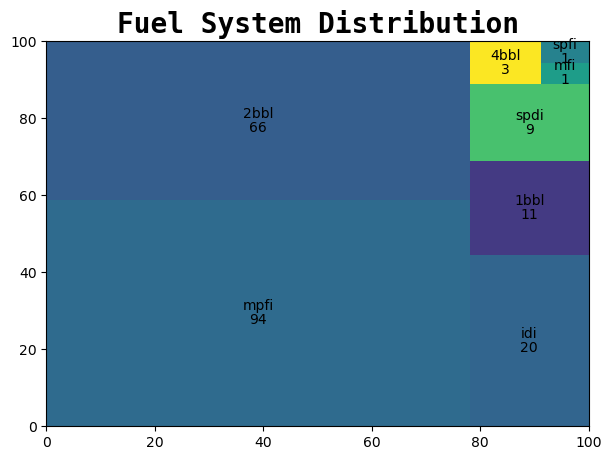

In [68]:
fuelsystem = df['fuelsystem'].value_counts()

plt.style.use('default')
plt.figure(figsize = (7, 5))
squarify.plot(sizes = fuelsystem.values, label = fuelsystem.index, value = fuelsystem.values)
plt.title('Fuel System Distribution', 
          fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.show()

In [69]:
df['CarName'] = df['CarName'].map({'alfa-romero giulia': 0, 'alfa-romero stelvio': 1, 
                                   'alfa-romero Quadrifoglio': 2, 'audi 100 ls': 3, 'audi 100ls': 4, 
                                   'audi fox': 5, 'audi 5000': 6, 'audi 4000': 7, 
                                   'audi 5000s (diesel)': 8, 'bmw 320i': 9, 'bmw x1': 10, 
                                   'bmw x3': 11, 'bmw z4': 12, 'bmw x4': 13, 'bmw x5': 14, 
                                   'chevrolet impala': 15, 'chevrolet monte carlo': 16, 
                                   'chevrolet vega 2300': 17, 'dodge rampage': 18, 
                                   'dodge challenger se': 19, 'dodge d200': 20, 
                                   'dodge monaco (sw)': 21, 'dodge colt hardtop': 22, 
                                   'dodge colt (sw)': 23, 'dodge coronet custom': 24, 
                                   'dodge dart custom': 25, 'dodge coronet custom (sw)': 26, 
                                   'honda civic': 27, 'honda civic cvcc': 28, 
                                   'honda accord cvcc': 29, 'honda accord lx': 30, 
                                   'honda civic 1500 gl': 31, 'honda accord': 32, 
                                   'honda civic 1300': 33, 'honda prelude': 34, 
                                   'honda civic (auto)': 35, 'isuzu MU-X': 36, 'isuzu D-Max ': 37, 
                                   'isuzu D-Max V-Cross': 38, 'jaguar xj': 39, 'jaguar xf': 40, 
                                   'jaguar xk': 41, 'maxda rx3': 42, 'maxda glc deluxe': 43, 
                                   'mazda rx2 coupe': 44, 'mazda rx-4': 45, 
                                   'mazda glc deluxe': 46, 'mazda 626': 47, 'mazda glc': 48, 
                                   'mazda rx-7 gs': 49, 'mazda glc 4': 50, 'mazda glc custom l': 51, 
                                   'mazda glc custom': 52, 'buick electra 225 custom': 53, 
                                   'buick century luxus (sw)': 54, 'buick century': 55, 
                                   'buick skyhawk': 56, 'buick opel isuzu deluxe': 57, 
                                   'buick skylark': 58, 'buick century special': 59, 
                                   'buick regal sport coupe (turbo)': 60, 'mercury cougar': 61, 
                                   'mitsubishi mirage': 62, 'mitsubishi lancer': 63, 
                                   'mitsubishi outlander': 64, 'mitsubishi g4': 65, 
                                   'mitsubishi mirage g4': 66, 'mitsubishi montero': 67, 
                                   'mitsubishi pajero': 68, 'Nissan versa': 69, 'nissan gt-r':70, 
                                   'nissan rogue': 71, 'nissan latio': 72, 'nissan titan': 73, 
                                   'nissan leaf': 74, 'nissan juke': 75, 'nissan note': 76, 
                                   'nissan clipper': 77, 'nissan nv200': 78, 'nissan dayz': 79, 
                                   'nissan fuga': 80, 'nissan otti': 81, 'nissan teana': 82, 
                                   'nissan kicks': 83, 'peugeot 504': 84, 'peugeot 304': 85, 
                                   'peugeot 504 (sw)': 86, 'peugeot 604sl': 87, 
                                   'peugeot 505s turbo diesel': 88, 'plymouth fury iii': 89, 
                                   'plymouth cricket': 90, 'plymouth satellite custom (sw)': 91, 
                                   'plymouth fury gran sedan': 92, 'plymouth valiant': 93, 
                                   'plymouth duster': 94, 'porsche macan': 95, 
                                   'porcshce panamera': 96, 'porsche cayenne': 97, 
                                   'porsche boxter': 98, 'renault 12tl': 99, 'renault 5 gtl': 100, 
                                   'saab 99e': 101, 'saab 99le': 102, 'saab 99gle': 103, 
                                   'subaru': 104, 'subaru dl': 105, 'subaru brz': 106, 
                                   'subaru baja': 107, 'subaru r1': 108, 'subaru r2': 109, 
                                   'subaru trezia': 110, 'subaru tribeca': 111, 
                                   'toyota corona mark ii': 112, 'toyota corona': 113, 
                                   'toyota corolla 1200': 114, 'toyota corona hardtop': 115, 
                                   'toyota corolla 1600 (sw)': 116, 'toyota carina': 117, 
                                   'toyota mark ii': 118, 'toyota corolla': 119, 
                                   'toyota corolla liftback': 120, 
                                   'toyota celica gt liftback': 121, 
                                   'toyota corolla tercel': 122, 'toyota corona liftback': 123, 
                                   'toyota starlet': 124, 'toyota tercel': 125, 
                                   'toyota cressida': 126, 'toyota celica gt': 127, 
                                   'toyouta tercel': 128, 'vokswagen rabbit': 129, 
                                   'volkswagen 1131 deluxe sedan': 130, 
                                   'volkswagen model 111': 131, 'volkswagen type 3': 132, 
                                   'volkswagen 411 (sw)': 133, 'volkswagen super beetle': 134, 
                                   'volkswagen dasher': 135, 'vw dasher': 136, 'vw rabbit': 137, 
                                   'volkswagen rabbit': 138, 'volkswagen rabbit custom': 139, 
                                   'volvo 145e (sw)': 140, 'volvo 144ea': 141, 'volvo 244dl': 142, 
                                   'volvo 245': 143, 'volvo 264gl': 144, 'volvo diesel': 145, 
                                   'volvo 246': 146})
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,0,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,2,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,3,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,4,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [70]:
df['fueltype'] = df['fueltype'].map({'gas': 0, 'diesel': 1})
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,0,0,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,0,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,2,0,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,3,0,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,4,0,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [71]:
df['aspiration'] = df['aspiration'].map({'std': 0, 'turbo': 1})
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,0,0,0,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,0,0,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,2,0,0,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,3,0,0,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,4,0,0,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [72]:
df['doornumber'] = df['doornumber'].map({'four': 0, 'two': 1})
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,0,0,0,1,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,0,0,1,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,2,0,0,1,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,3,0,0,0,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,4,0,0,0,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [73]:
df['carbody'] = df['carbody'].map({'sedan': 0, 'hatchback': 1, 'wagon': 2, 'hardtop': 3, 
                                   'convertible': 4})
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,0,0,0,1,4,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,0,0,1,4,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,2,0,0,1,1,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,3,0,0,0,0,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,4,0,0,0,0,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [74]:
df['drivewheel'] = df['drivewheel'].map({'fwd': 0, 'rwd': 1, '4wd': 2})
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,0,0,0,1,4,1,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,0,0,1,4,1,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,2,0,0,1,1,1,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,3,0,0,0,0,0,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,4,0,0,0,0,2,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [75]:
df['enginelocation'] = df['enginelocation'].map({'front': 0, 'rear': 1})
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,0,0,0,1,4,1,0,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,0,0,1,4,1,0,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,2,0,0,1,1,1,0,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,3,0,0,0,0,0,0,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,4,0,0,0,0,2,0,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [76]:
df['enginetype'] = df['enginetype'].map({'ohc': 0, 'ohcf': 1, 'ohcv': 2, 
                                                 'dohc': 3, 'l': 4, 'rotor': 5, 'dohcv': 6})
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,0,0,0,1,4,1,0,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,0,0,1,4,1,0,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,2,0,0,1,1,1,0,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,3,0,0,0,0,0,0,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,4,0,0,0,0,2,0,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [77]:
df['cylindernumber'] = df['cylindernumber'].map({'four': 0, 'six': 1, 'five': 2, 
                                                 'eight': 3, 'two': 4, 'three': 5, 'twelve': 6})
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,0,0,0,1,4,1,0,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,0,0,1,4,1,0,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,2,0,0,1,1,1,0,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,3,0,0,0,0,0,0,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,4,0,0,0,0,2,0,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [78]:
df['fuelsystem'] = df['fuelsystem'].map({'mpfi': 0, '2bbl': 1, 'idi': 2, '1bbl': 3, 'spdi': 4, 
                                         '4bbl': 5, 'mfi': 6, 'spfi': 7})
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,0,0,0,1,4,1,0,88.6,168.8,...,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,0,0,1,4,1,0,88.6,168.8,...,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,2,0,0,1,1,1,0,94.5,171.2,...,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,3,0,0,0,0,0,0,99.8,176.6,...,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,4,0,0,0,0,2,0,99.4,176.6,...,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0


# Training and Testing

In [79]:
X = df[['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 
          'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 
          'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 
          'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']]
y = df['price']

In [80]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [81]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Mean Squared Error: 13299775.681141777
R-squared: 0.8282045812207971


In [82]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

model.score(X_test, predictions)

1.0

In [83]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Mean Squared Error: 9475127.18902439
R-squared: 0.8776082031418959
